In [18]:
import matplotlib.pyplot as plt
import numpy as np

from skfda.datasets import fetch_growth

from skfda.ml.clustering import KMeans
import math
import time
from skfda.representation.grid import FDataGrid

from skfda.misc.metrics import l2_distance, TransformationMetric

In [2]:
# Obtenemos los datos 
X, y = fetch_growth(return_X_y=True, as_frame=True)
X = X.iloc[:, 0].values
categories = y.values.categories
y = y.values.codes

In [3]:
# Creamos un nuevo data grid a partir del obtenido para cambiar el nombre de los argumentos al castellano
X = FDataGrid(data_matrix = X.data_matrix,
              grid_points=X.grid_points,
              domain_range=X.domain_range,
              argument_names=('edad',),
              coordinate_names=('altura',))

 /home/ejerez/Escritorio/UNI/QUINTO/Matrícula y TFGs/TFG/codigo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


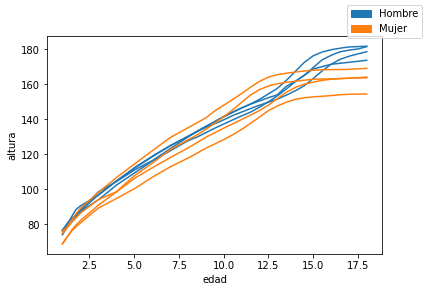

In [11]:
# Escogemos elementos aleatorios para una primera visualización, sabiendo que en total hay 93 muestras y que las 39 primeras son hombres, y el resto mujeres
indices_samples = np.array([1, 3, 5, 10, 60, 75, 80, 92])
X_red = X[indices_samples]
y_red = y[indices_samples]

p = X_red.plot(group=y_red, group_names=['Hombre', 'Mujer'])

plt.savefig("img/berkeley/berkeleyejemplo.png",dpi=300)
p.show()

 /home/ejerez/Escritorio/UNI/QUINTO/Matrícula y TFGs/TFG/codigo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


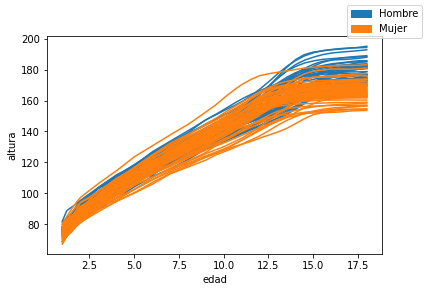

In [12]:
# visualización de todos los datos
p = X.plot(group=y, group_names=['Hombre', 'Mujer'])

plt.savefig("img/berkeley/berkeleytodo.png",dpi=300)
p.show()

In [13]:
def getPrecision(pred, y):
    combined = list(zip(y, pred))
    count = [1 if ele[0]==ele[1] else 0 for ele in combined]
    # Como en K means no sabemos si el Clúster 0 es hombre o mujer, calculamos el máximo 
    return max(1- sum(count)/len(combined), sum(count)/len(combined))

In [15]:
# Ejecutamos el método de K-medias con la distancia euclídea
seed = math.floor(time.time())
kmeans = KMeans(n_clusters=2, random_state=seed)
kmeans.fit(X)
pred = kmeans.predict(X)

 /home/ejerez/Escritorio/UNI/QUINTO/Matrícula y TFGs/TFG/codigo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


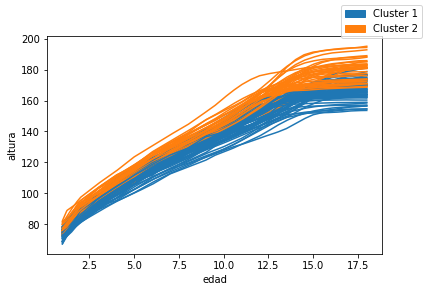

In [16]:
# Mostramos los resultados de K-medias con dicha distancia
p = X.plot(group = pred, group_names = ['Cluster 1', 'Cluster 2'])
plt.savefig("img/berkeley/berkeleykmeans.png",dpi=300)
p.show()

In [17]:
# Caluclamos su 'acierto'
getPrecision(pred, y)

0.6451612903225806

In [ ]:
# Probamos a continuación con la distancia euclídea sobre las derivadas de las curvas

In [19]:
dist = TransformationMetric(transformation=lambda x: x.derivative(), metric = l2_distance)
seed = math.floor(time.time())
kmeans = KMeans(n_clusters=2, metric=dist, random_state=seed)
kmeans.fit(X)
pred2 = kmeans.predict(X)

 /home/ejerez/Escritorio/UNI/QUINTO/Matrícula y TFGs/TFG/codigo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


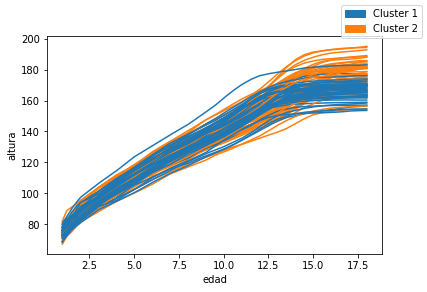

In [20]:
p = X.plot(group = pred2, group_names = ['Cluster 1', 'Cluster 2'])
plt.savefig("img/berkeley/berkeleykmeans.png",dpi=300)
p.show()

In [21]:
# Calculamos su 'precisión'
getPrecision(pred2, y)

0.8924731182795699